# Read the Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Exploration

In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


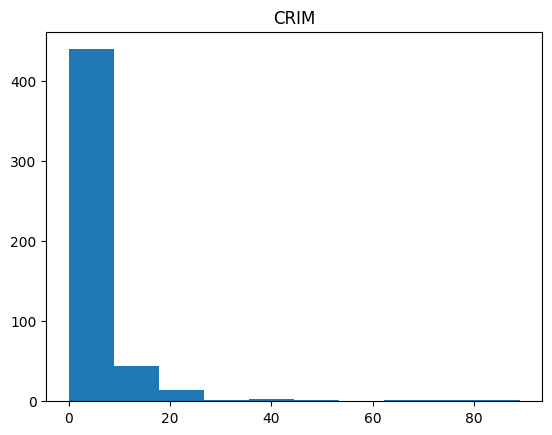

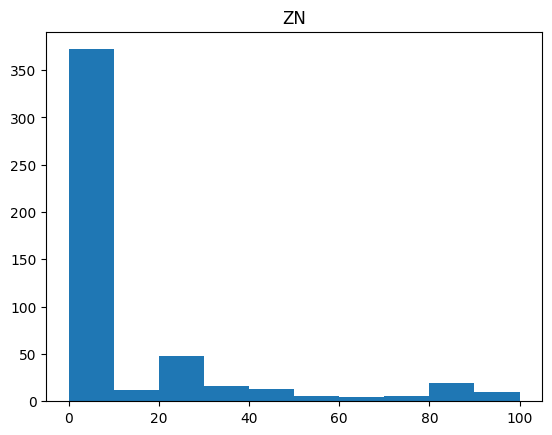

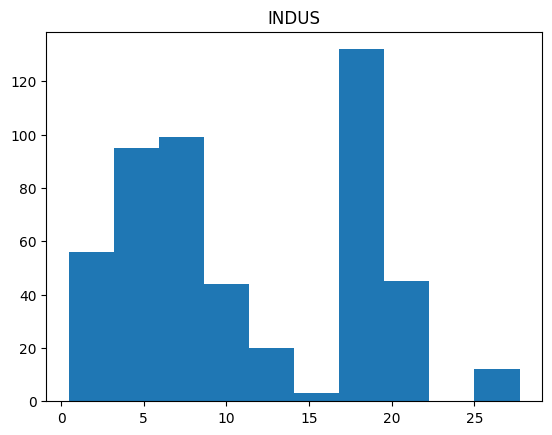

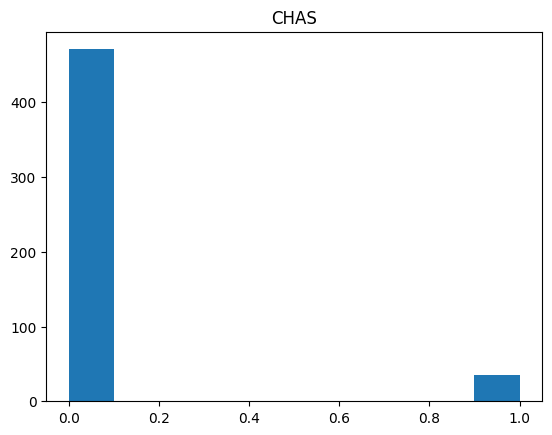

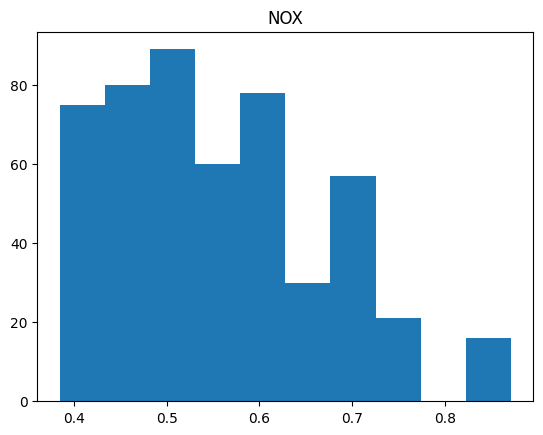

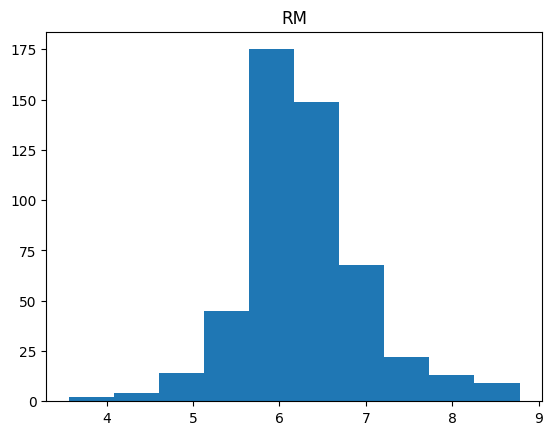

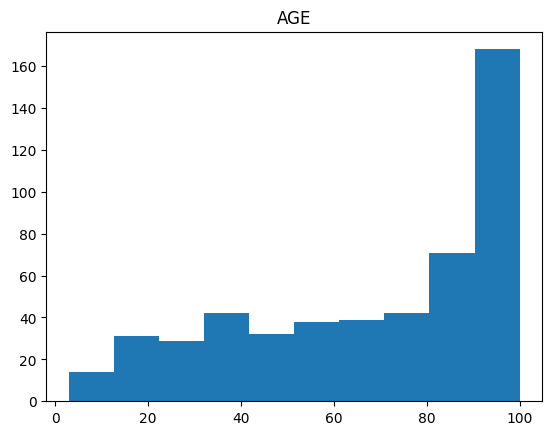

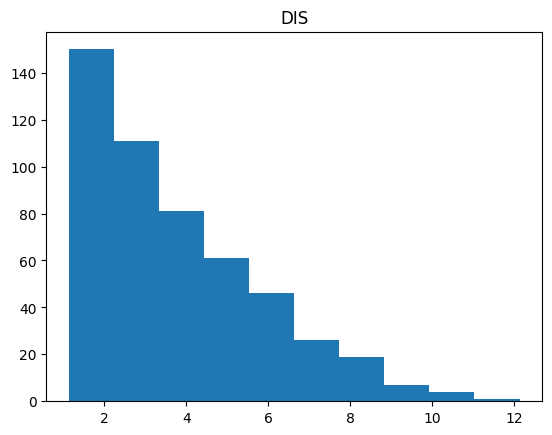

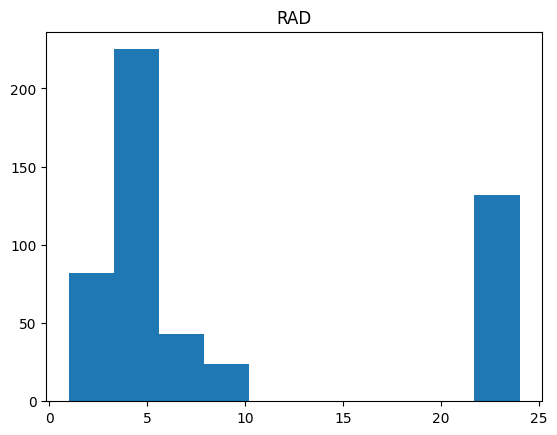

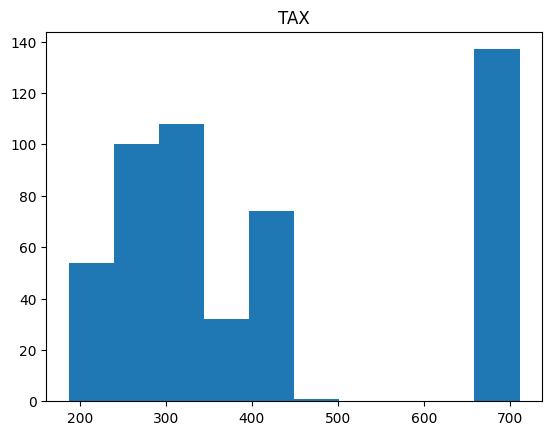

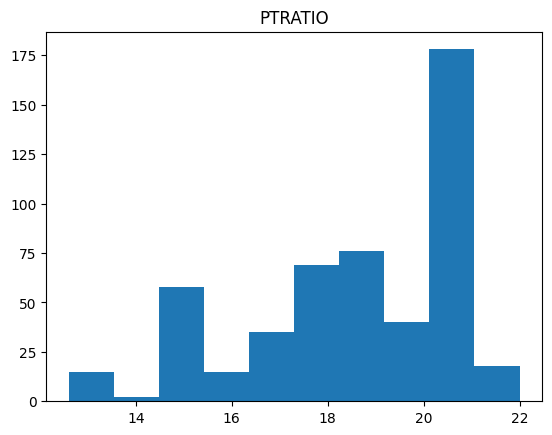

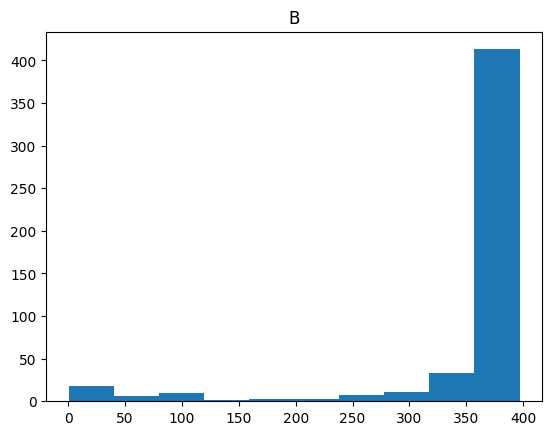

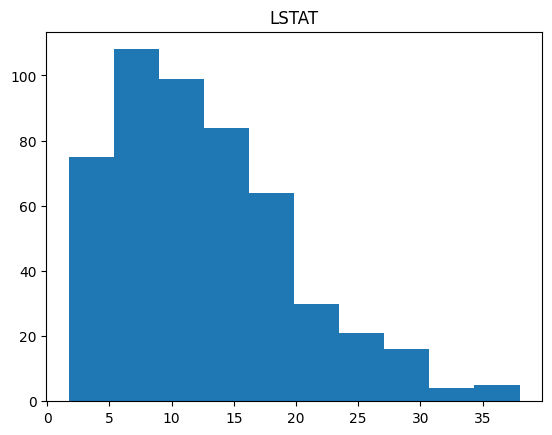

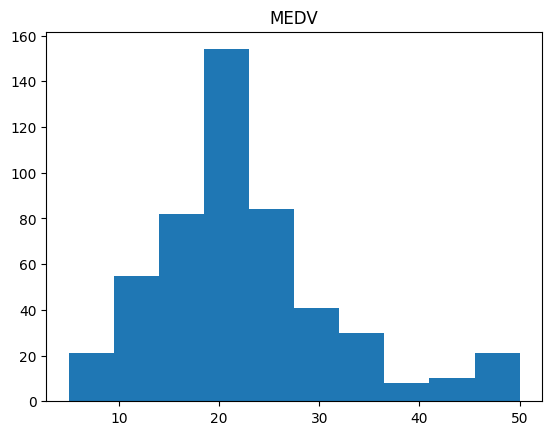

In [ ]:
import matplotlib.pyplot as plt

for col in df.columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

# Data Preprocessing

## Data Cleaning

## Handling Missing Values

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.dropna(axis = 0, inplace = True)

## Handling Duplicate Values

In [ ]:
df.duplicated().sum()

0

### Handling Outliers

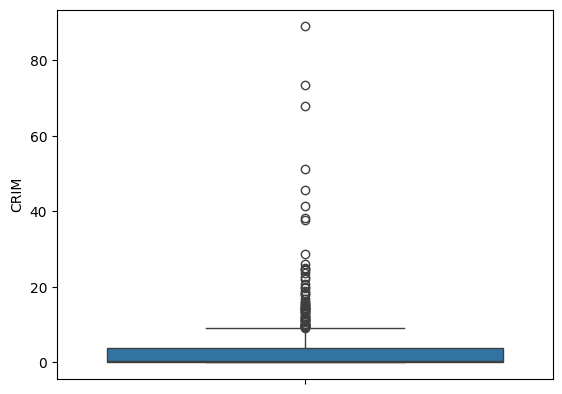

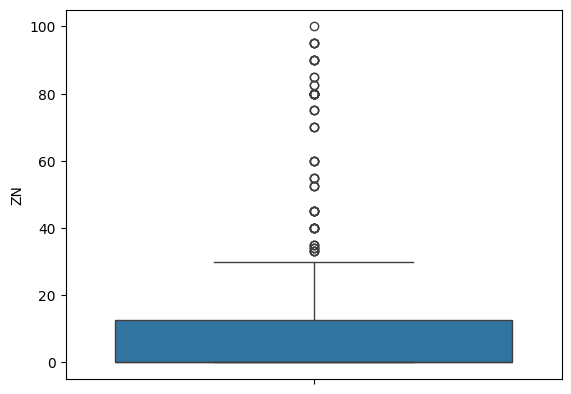

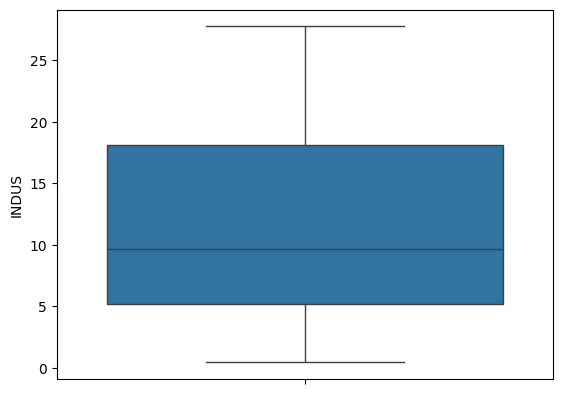

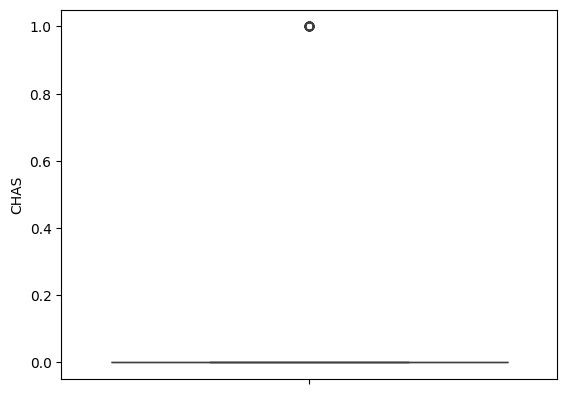

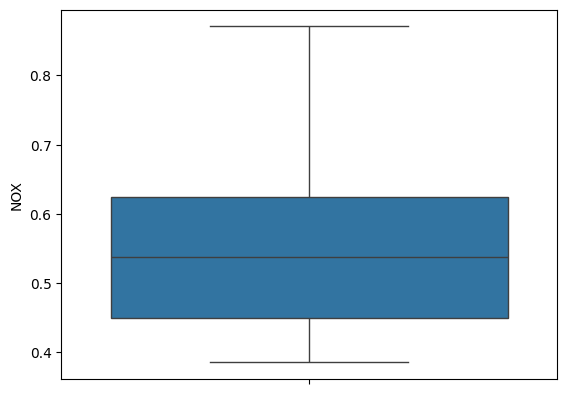

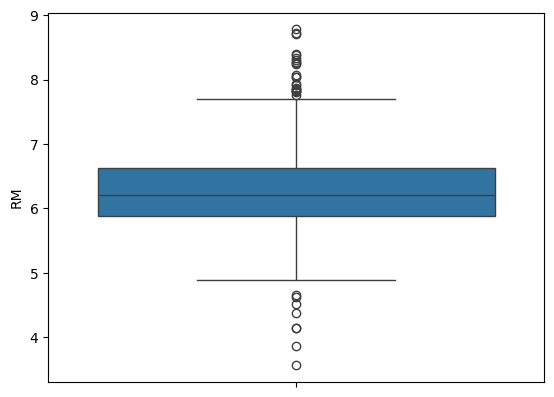

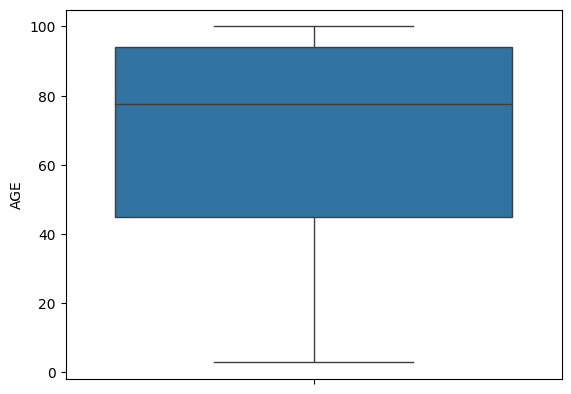

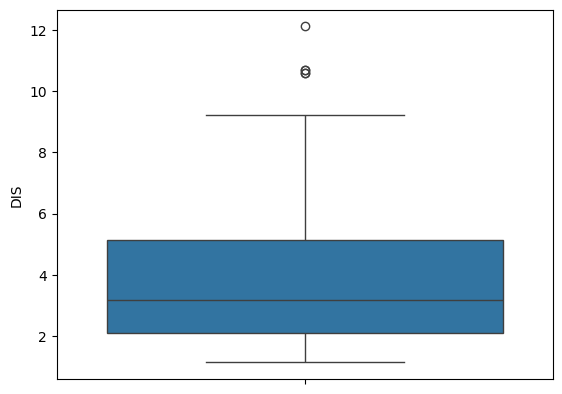

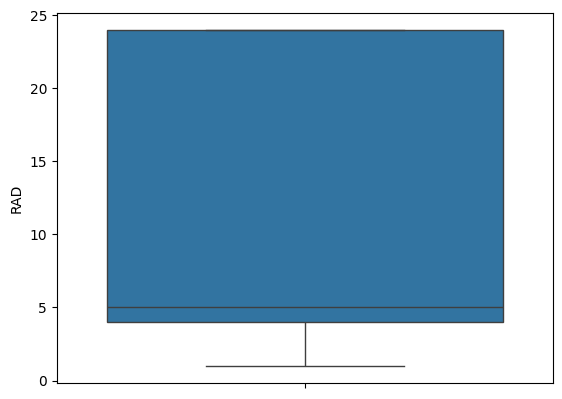

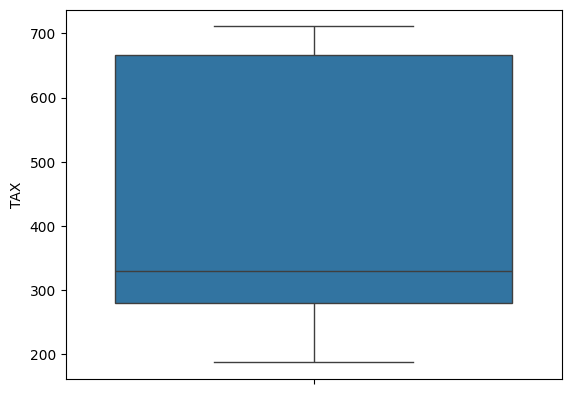

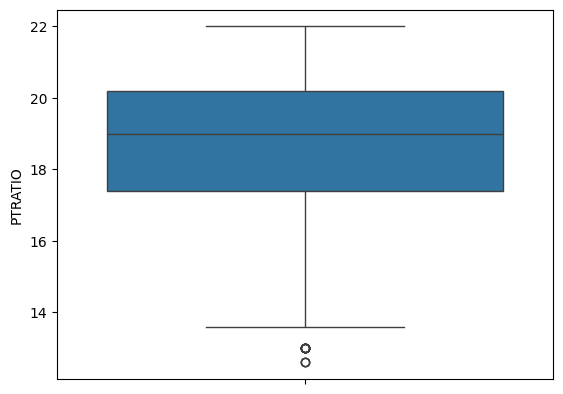

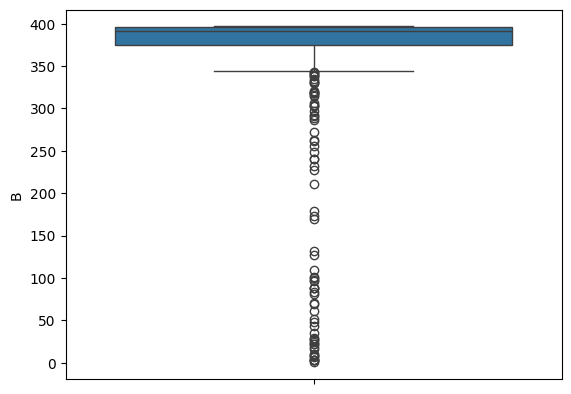

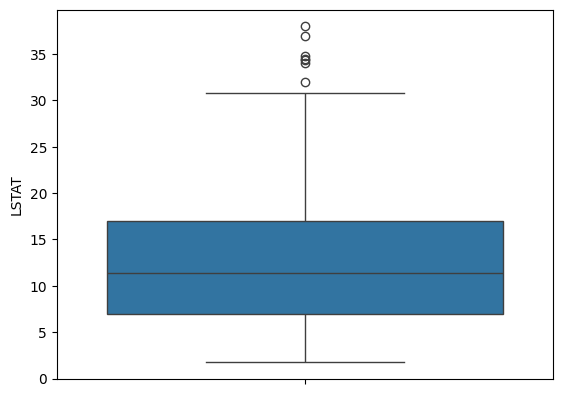

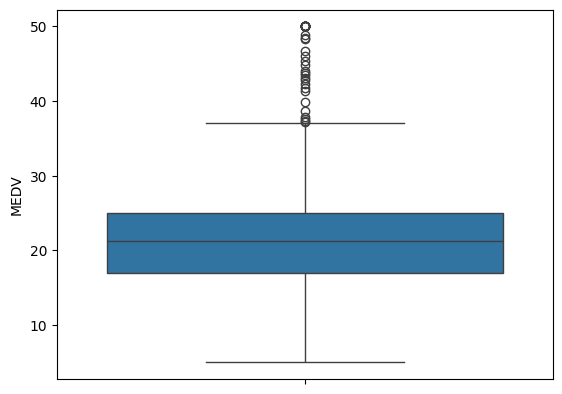

In [ ]:
import seaborn as sns

for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

## Feature Engineering

### Feature Transformation

#### Scaling and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standard Scaler scales the values of a continuous variable such that they become a
# standard normal distribution i.e., the mean becomes zero and the standard
# deviation becomes equal to one.

for col in df.columns:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[[col]])

#### Encoding Categorical Variables

In [ ]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


## Data Splitting

### Split into features (x) and target (y)

In [ ]:
x = df.drop(columns = ['MEDV'])
y = df['MEDV']

### Split into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8)

# Build the Model

## Model Selection

Train and evaluate different with different hyperparameters

In [ ]:
from sklearn.metrics import r2_score

def eval_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  trainpred = model.predict(xtrain)
  testpred = model.predict(xtest)
  print('Evaluation on training data: ')
  print(r2_score(ytrain, trainpred))
  print('Evaluation on testing data: ')
  print(r2_score(ytest, testpred))

In [ ]:
from sklearn.linear_model import LinearRegression

eval_model(LinearRegression(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.7269114345986234
Evaluation on testing data: 
0.7744641558061707


In [ ]:
from sklearn.linear_model import Lasso

eval_model(Lasso(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.0
Evaluation on testing data: 
-0.012260960378455588


In [ ]:
from sklearn.linear_model import Ridge

eval_model(Ridge(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.7268899050028228
Evaluation on testing data: 
0.7744269312357346


In [ ]:
from sklearn.tree import DecisionTreeRegressor

eval_model(DecisionTreeRegressor(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
1.0
Evaluation on testing data: 
0.7723486499181589


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

eval_model(KNeighborsRegressor(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.8434218866740506
Evaluation on testing data: 
0.6632747923797735


In [ ]:
from sklearn.svm import SVR

eval_model(SVR(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.8668707267319574
Evaluation on testing data: 
0.8149200664234105


In [ ]:
from sklearn.ensemble import RandomForestRegressor

eval_model(RandomForestRegressor(), xtrain, ytrain, xtest, ytest)

Evaluation on training data: 
0.9793461697033068
Evaluation on testing data: 
0.9011071579423608


## Train the Model

In [ ]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

## Predictions

Training as well as testing data

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

## Evaluate the Model

In [ ]:
print('Evaluation on Training Data: ')
print(r2_score(ytrain, trainpred))

Evaluation on Training Data: 
0.9822333617713627


In [ ]:
print('Evaluation on Testing Data: ')
print(r2_score(ytest, testpred))

Evaluation on Testing Data: 
0.8994448132690518
